In [1]:
import torch
from rankloss import rank_loss, rank_loss_normal, smoothSeq
from pooling import Pooling_layer
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
batch_size = 3
seq_len = 32
channel = 64
f = torch.rand(batch_size, seq_len, channel) 
f_st = torch.rand(batch_size, 1, channel) 

In [6]:
img_pil = Image.open("test_img.jpg")
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
img_tensor = transform(img_pil)
img_tensor = img_tensor.unsqueeze(0)
print(img_tensor.shape)

torch.Size([1, 1, 355, 355])


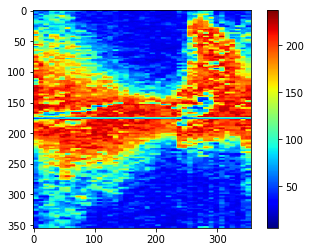

In [11]:
transform = transforms.ToPILImage()
img_pil = transform(img_tensor.squeeze(0))
plt.imshow(img_pil, cmap="jet")
cbar = plt.colorbar()

In [7]:
pl = Pooling_layer(0.9)
img_tensor
img_ds = pl(img_tensor)
img_ds = img_ds.squeeze(0)

/YLM_Yi_Zhou/project_attention/utils/pooling.py:73: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  fft = torch.rfft(input, 2, normalized=True, onesided=False)


In [13]:
list(pl.parameters())

[]

In [8]:
img_tensor.shape

torch.Size([1, 1, 355, 355])

In [9]:
img_ds = img_ds.squeeze(0)
transform = transforms.ToPILImage()
img_ds = transform(img_ds)

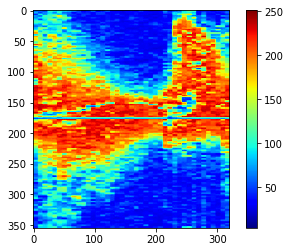

In [10]:
plt.imshow(img_ds, cmap="jet")
cbar = plt.colorbar()

In [3]:
f = smoothSeq(f)

In [4]:
rl = rank_loss(f_st, f, 0.1)

In [5]:
rl

tensor(23.6873)

In [6]:
rln = rank_loss_normal(f_st, f, 0.1)

In [7]:
rln

tensor(0.7453)

In [35]:
def smoothSeq(seq):
    cumulative_sum = torch.cumsum(seq, dim=1)
    accumulated_time = torch.arange(1, seq.size(1) + 1, dtype=seq.dtype, device=seq.device)
    smoothed_seq = cumulative_sum / accumulated_time.view(1, seq.size(1), 1)
    return smoothed_seq

def softplus(x):
    return torch.log(1 + torch.exp(x))

def rank_loss(f_st, f, beta):
    loss = 0
    _, length, feature_size = f.shape
    f_smooth = smoothSeq(f)
    for i in range(length-1):
        theta = torch.sum(f_st.squeeze() * f_smooth[:, i+1, :].squeeze(), dim=1) - torch.sum(f_st.squeeze() * f_smooth[:, i, :].squeeze(), dim=1) + beta
        time_loss = softplus(theta) 
        #print(time_loss)
        #print(loss)
        loss += time_loss
    loss /=  length-1
    return torch.mean(loss)

In [36]:
rl = rank_loss(f_st, f, 0.1)
print(rl)

tensor(0.7641)
